<a href="https://colab.research.google.com/github/anagarciasaiz/USA_Housing/blob/main/usa_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Cargar datos



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv('USA_Housing.csv')

In [4]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


##Datos nulos



In [6]:
nulos = df.isna().sum()
nulos

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [7]:
df.isnull().values.any()

False

no hay datos nulos

##Gráficas

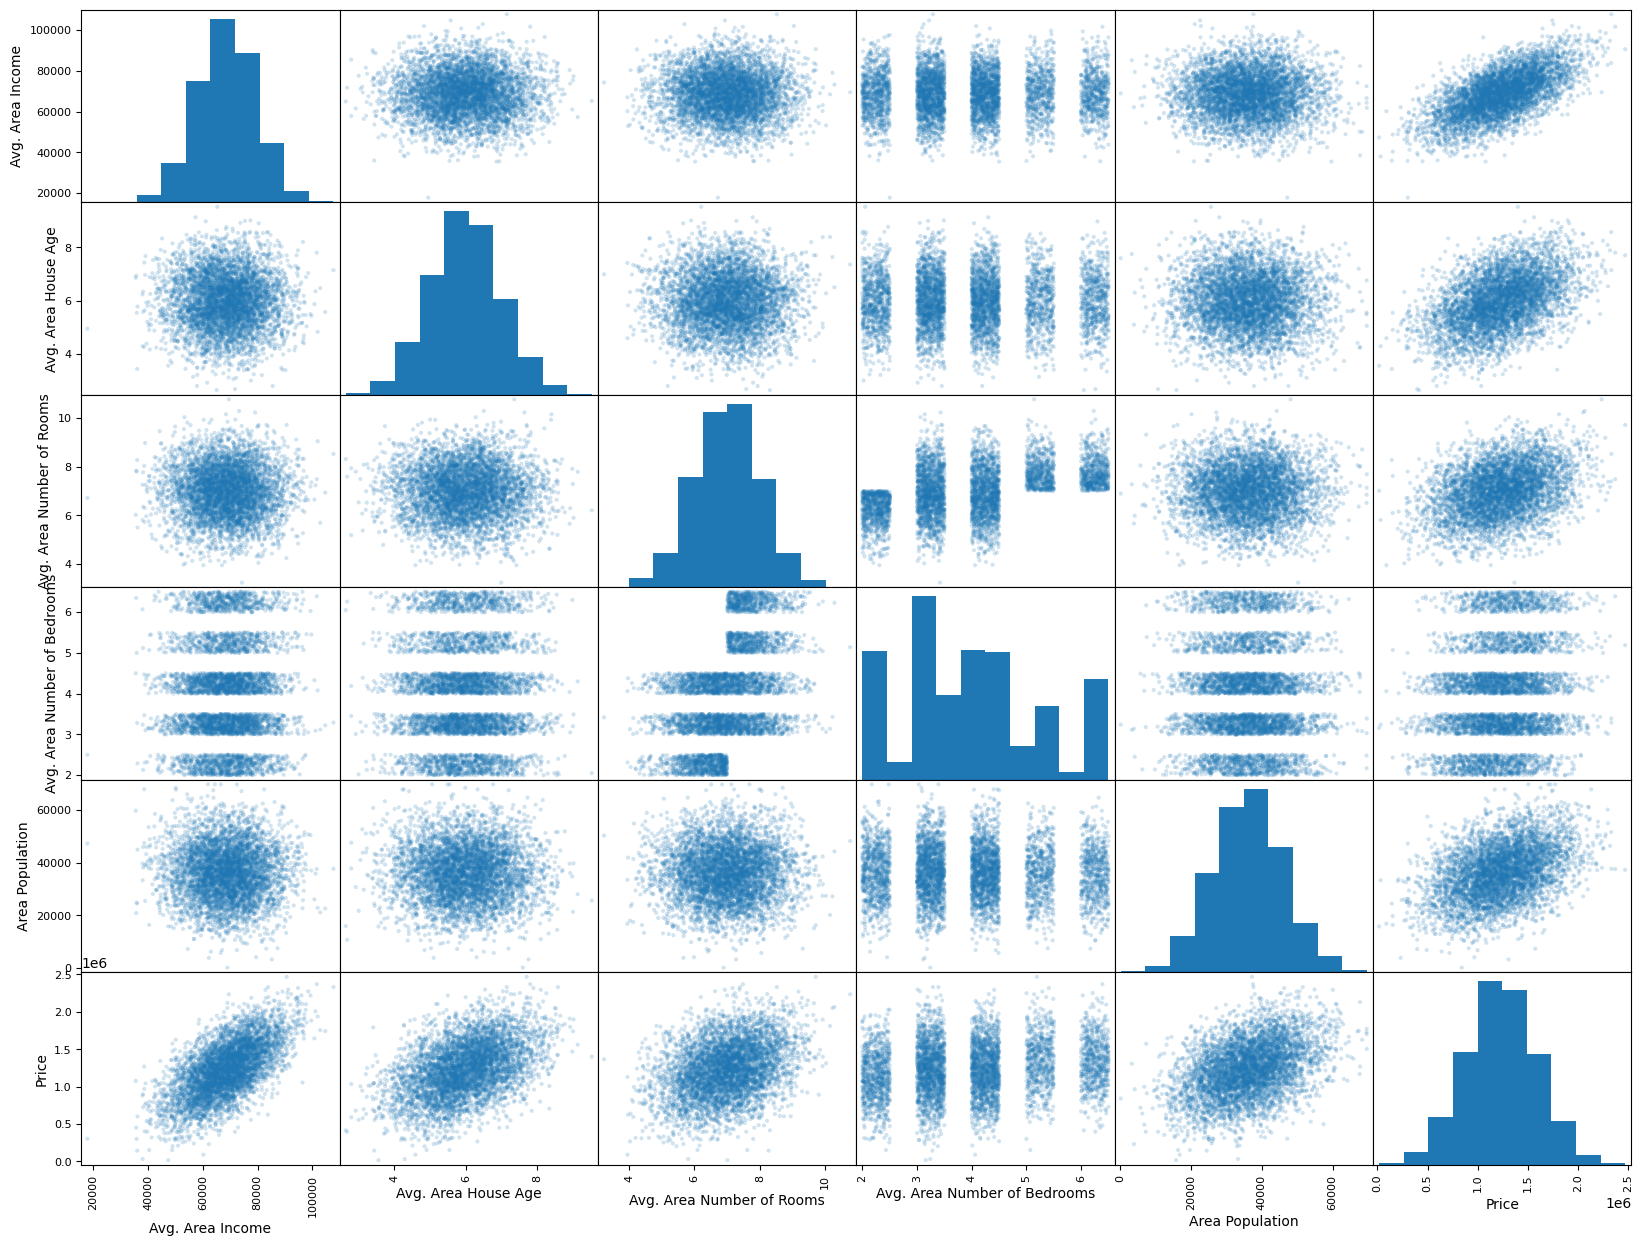

In [8]:
pd.plotting.scatter_matrix(df, figsize=(20, 15), alpha=0.2);

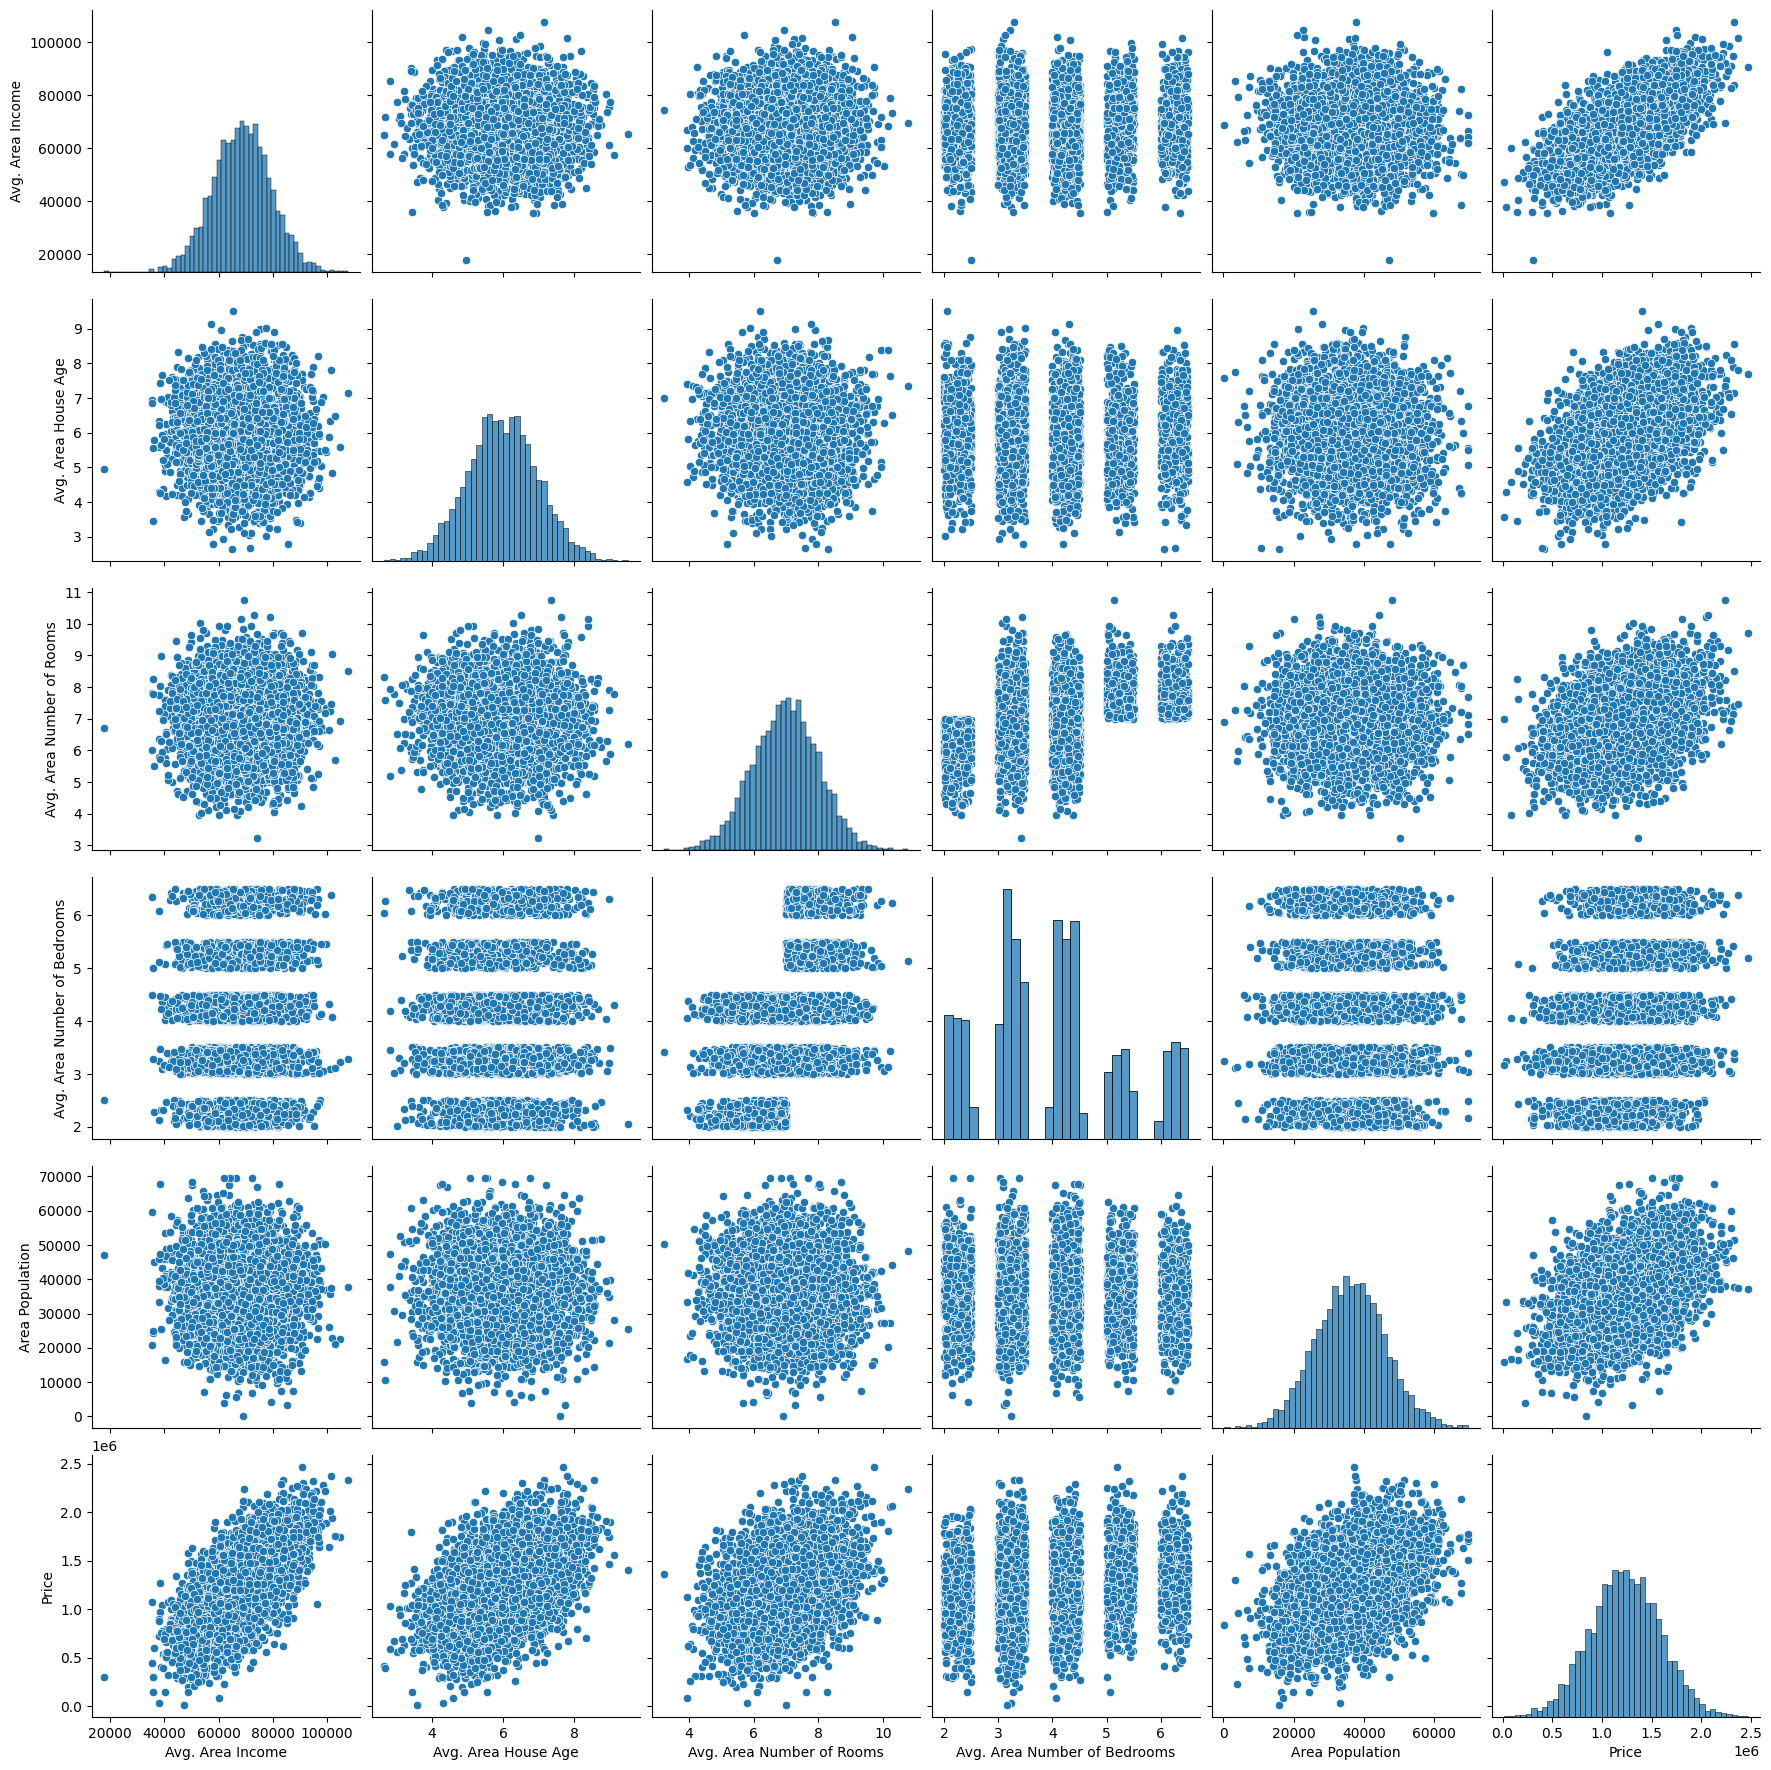

In [9]:
sns.pairplot(df, height=3)

##Filtrado

In [10]:
duplicate_sum = df.duplicated().sum()
if duplicate_sum > 0:
    print(f'Total de filas duplicadas: {duplicate_sum}')
else:
    print('No se encuentran filas duplicadas')

No se encuentran filas duplicadas


In [22]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
limite_inferior, limite_superior = Q1 - (1.5 * IQR), Q3 + (1.5 * IQR)
outliers = ((df < limite_inferior) | (df > limite_superior)).any(axis=1) 
df1 = df.drop(df[outliers].index)


<ipython-input-22-dbcb60c7b9fd>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
<ipython-input-22-dbcb60c7b9fd>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)
<ipython-input-22-dbcb60c7b9fd>:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = ((df < limite_inferior) | (df > limite_superior)).any(axis=1)


In [24]:
print(df1.shape)

(4865, 7)


##Matriz correlacion

<ipython-input-25-2391ba12c82e>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df1.corr(), annot = True, linewidths=.5, cmap="YlGnBu")


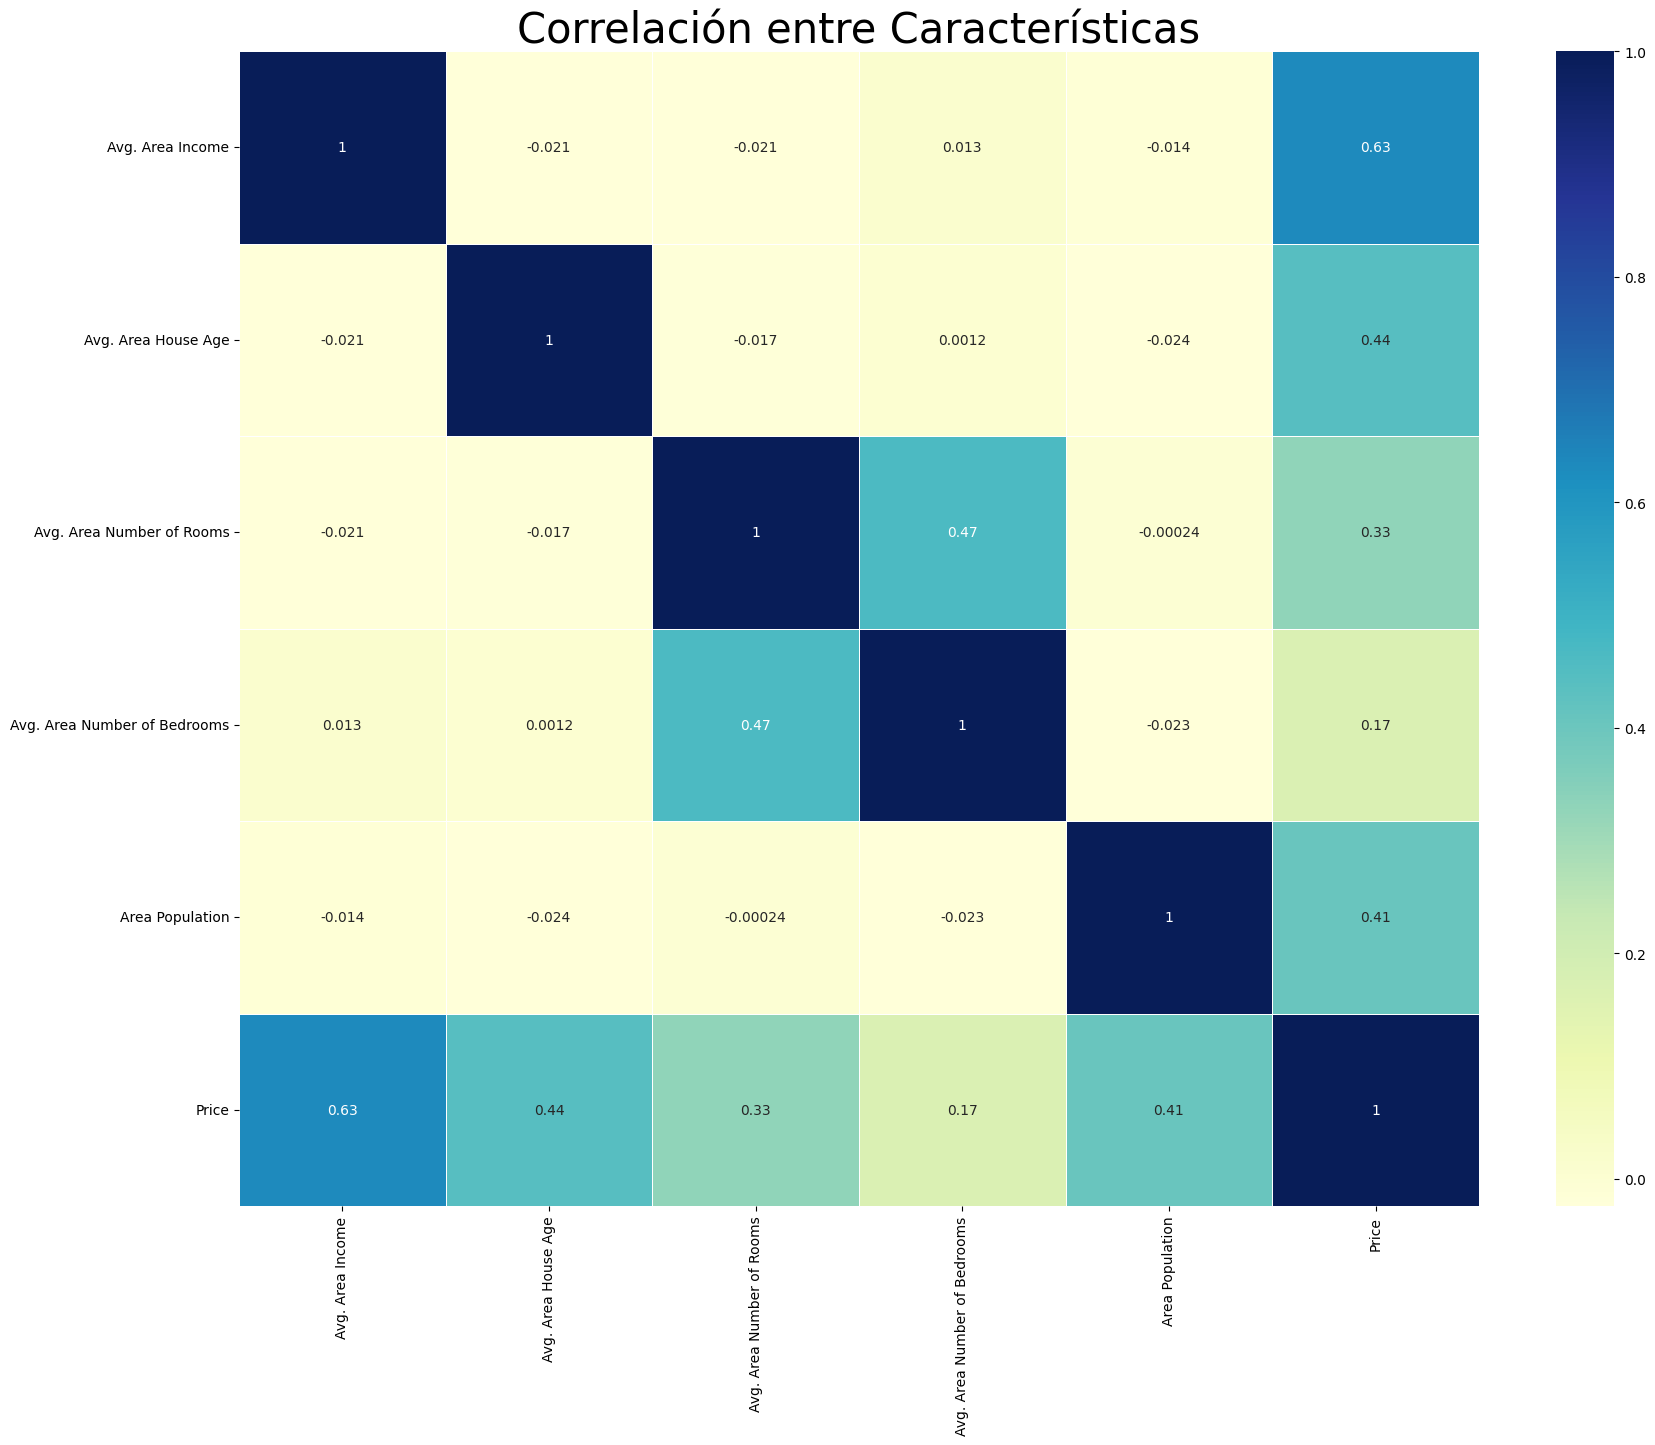

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (20, 15) 
sns.heatmap(df1.corr(), annot = True, linewidths=.5, cmap="YlGnBu")
plt.title('Correlación entre Características', fontsize = 30)
plt.show()

<ipython-input-35-3ed1a1a51dc0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df1.corr())


<Axes: >

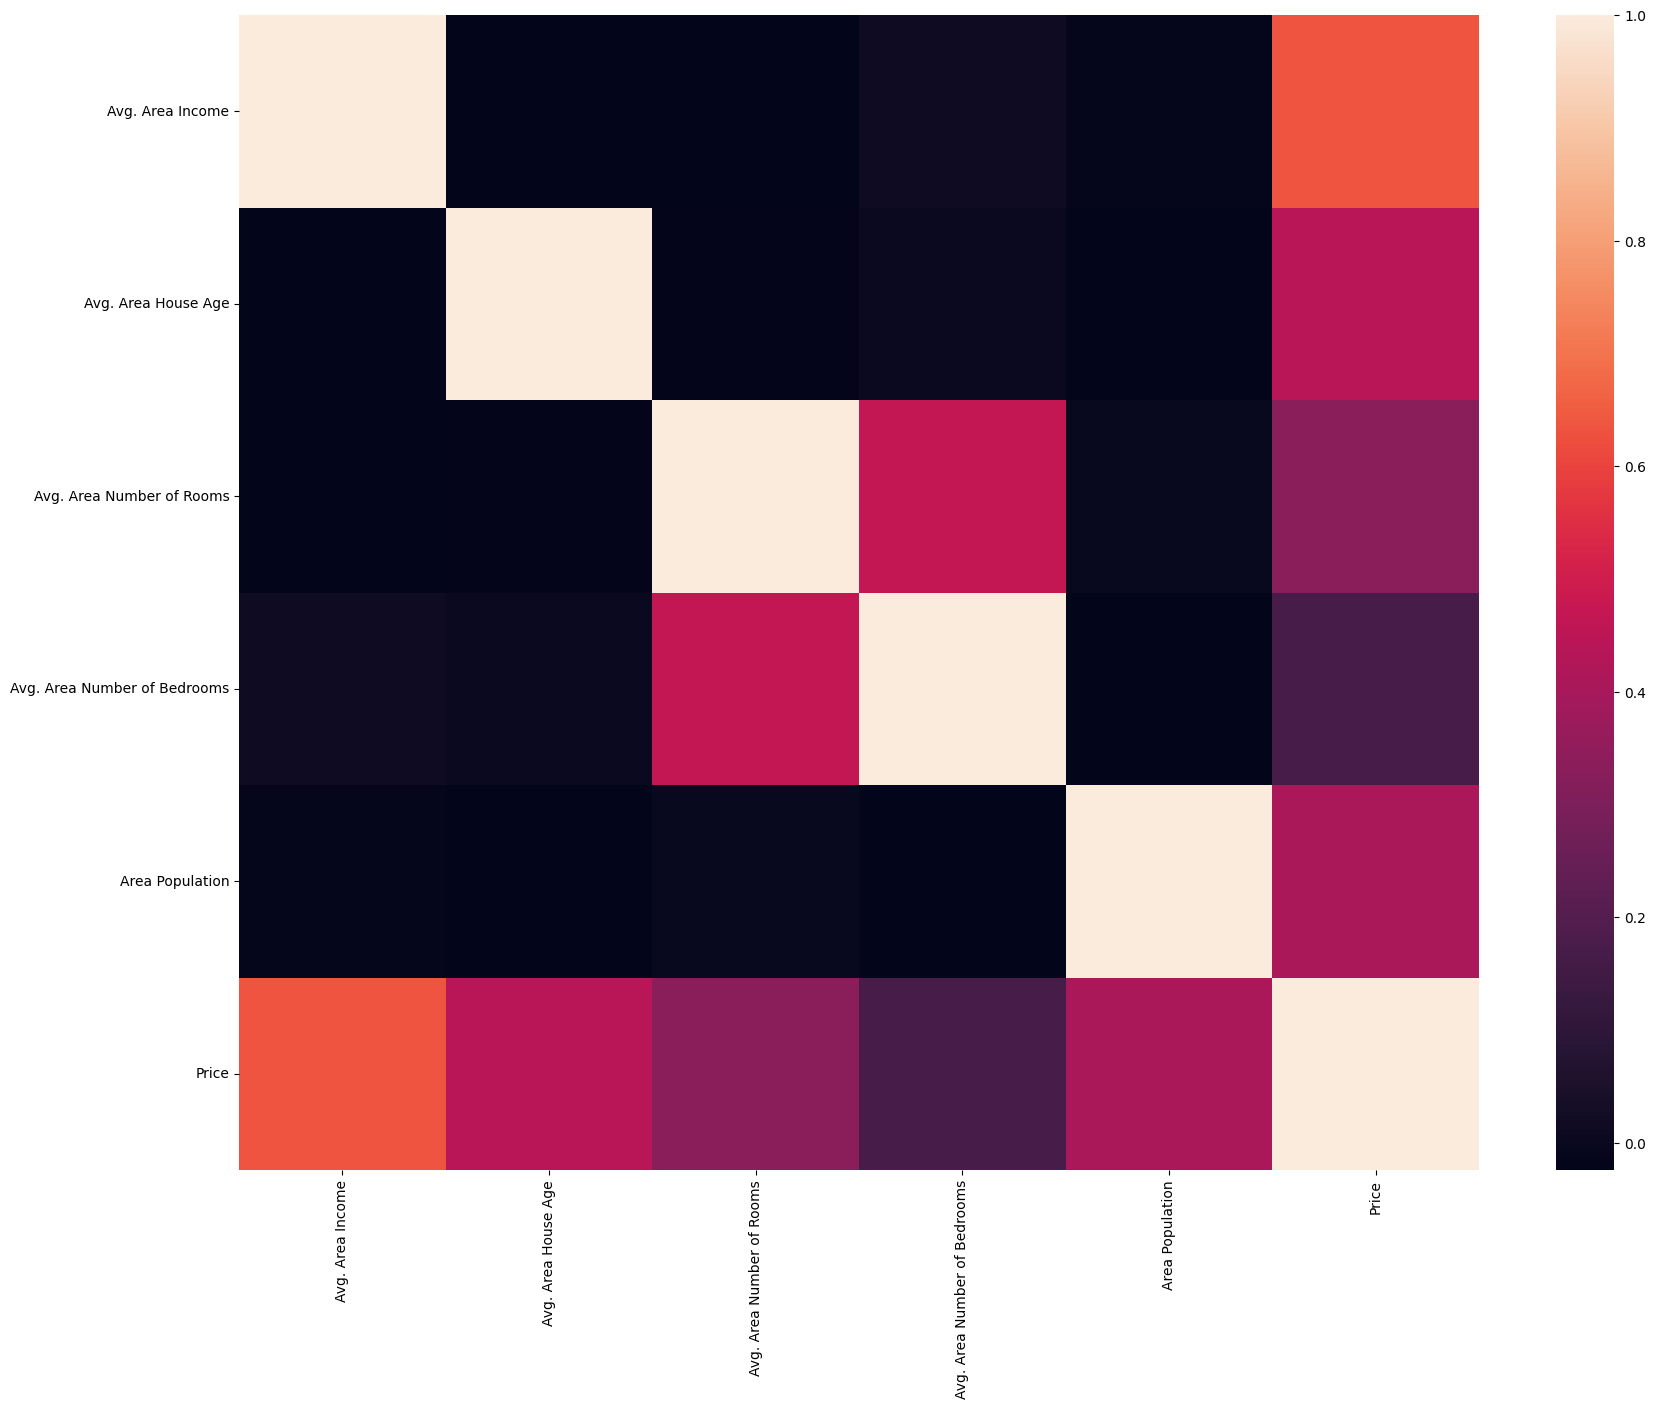

In [35]:
sns.heatmap(df1.corr())

##Visualización

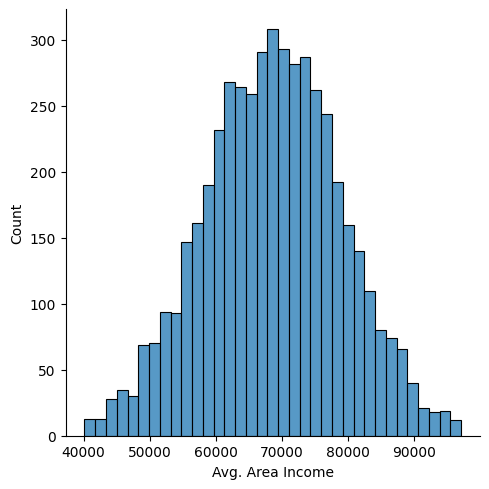

In [27]:
sns.displot(df1['Avg. Area Income'])

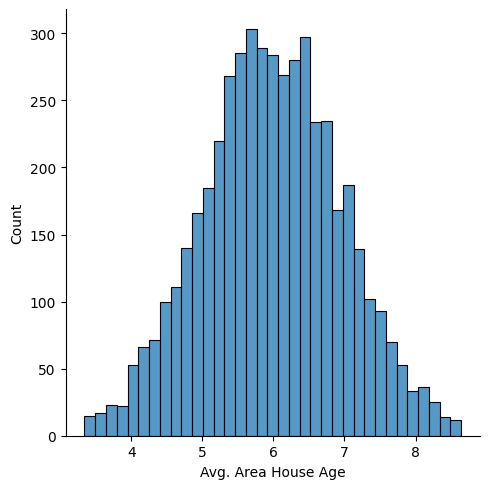

In [28]:
sns.displot(df1['Avg. Area House Age'])

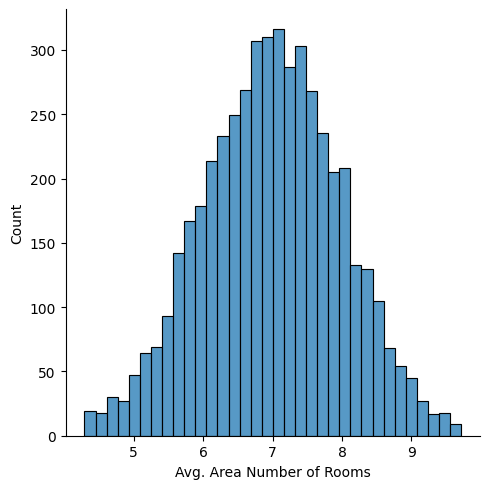

In [29]:
sns.displot(df1['Avg. Area Number of Rooms'])

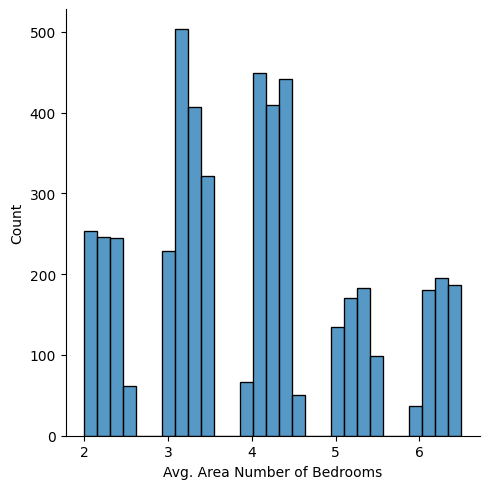

In [30]:
sns.displot(df1['Avg. Area Number of Bedrooms'])

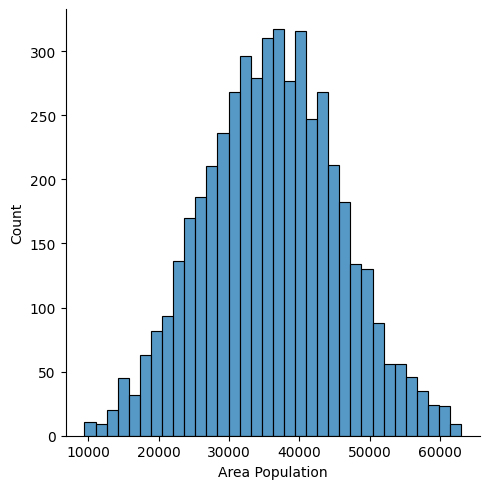

In [32]:
sns.displot(df1['Area Population'])

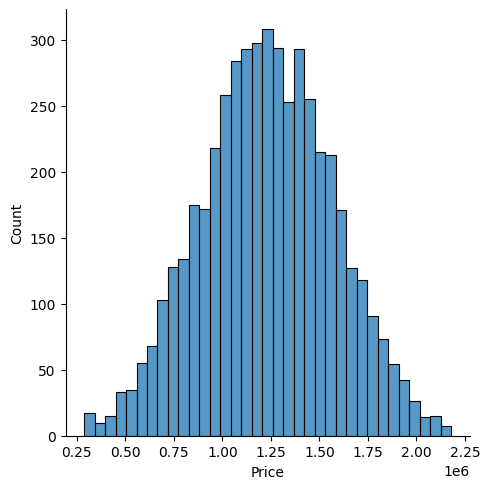

In [33]:
sns.displot(df1['Price'])